<a href="https://colab.research.google.com/github/maisiejacinda/datamining/blob/main/Unsupervised_K_Means_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Provinsi       Kab/Kota  \
0     ACEH       Simeulue   
1     ACEH   Aceh Singkil   
2     ACEH   Aceh Selatan   
3     ACEH  Aceh Tenggara   
4     ACEH     Aceh Timur   

   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  \
0                                              18.98                 
1                                              20.36                 
2                                              13.18                 
3                                              13.41                 
4                                              14.45                 

   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)  \
0                                         9.48   
1                                         8.68   
2                                         8.88   
3                                         9.67   
4                                         8.21   

   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)  \
0                                   

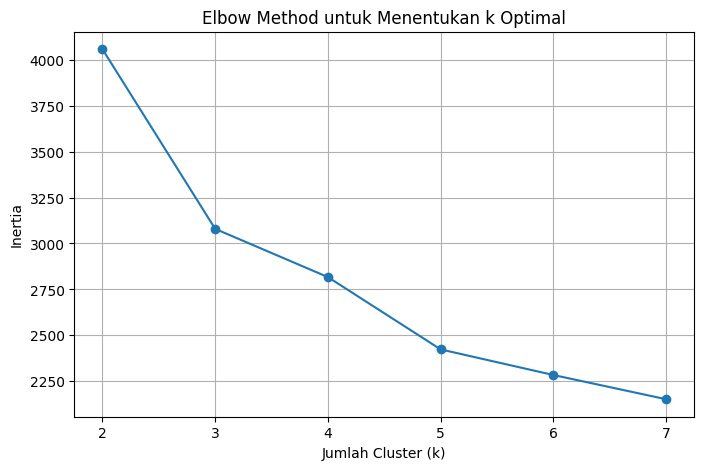


Jumlah data tiap cluster:
Cluster
1    330
0    126
2     58
Name: count, dtype: int64


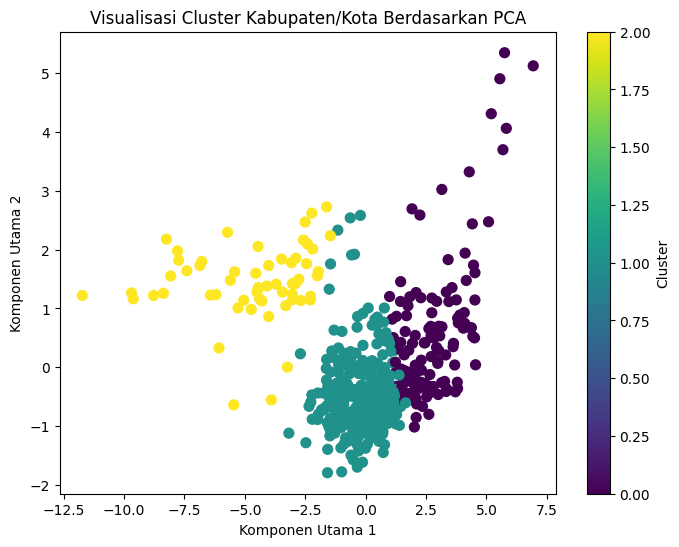


Perbandingan K-Means vs Hierarchical:
   Cluster  Cluster_HC
0        1           2
1        1           0
2        1           2
3        1           2
4        1           2

Ringkasan Karakteristik Tiap Cluster:
         Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  \
Cluster                                                                    
0                                                 7.468492                 
1                                                11.257394                 
2                                                28.490172                 

         Rata-rata Lama Sekolah Penduduk 15+ (Tahun)  \
Cluster                                                
0                                          10.163810   
1                                           8.141667   
2                                           6.362586   

         Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)  \
Cluster                                          

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

df = pd.read_csv("Klasifikasi Tingkat Kemiskinan di Indonesia.csv")

print(df.head())

print("\nMissing Value tiap kolom:")
print(df.isnull().sum())

X = df.select_dtypes(include=['float64', 'int64'])

print("\nKolom numerik yang digunakan:")
print(X.columns)



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2, 8), inertia, marker='o')
plt.title("Elbow Method untuk Menentukan k Optimal")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nJumlah data tiap cluster:")
print(df['Cluster'].value_counts())


pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', s=50)
plt.title("Visualisasi Cluster Kabupaten/Kota Berdasarkan PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.colorbar(label="Cluster")
plt.show()


hier = AgglomerativeClustering(n_clusters=3)
df['Cluster_HC'] = hier.fit_predict(X_scaled)

print("\nPerbandingan K-Means vs Hierarchical:")
print(df[['Cluster', 'Cluster_HC']].head())

cluster_summary = df.groupby('Cluster').mean(numeric_only=True)

print("\nRingkasan Karakteristik Tiap Cluster:")
print(cluster_summary)

df.to_csv("hasil_clustering_kemiskinan.csv", index=False)
print("\nHasil clustering disimpan ke file 'hasil_clustering_kemiskinan.csv'")
